In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Specify the path to your CSV file
file_path = r'C:\Users\manda\Documents\Master thesis Data\Data file (1877-1922 transcribed data) (1).csv'


# Try different encodings until you find the right one
encodings = ['utf-8', 'latin1', 'utf-16']

for encoding in encodings:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding=encoding)
        # Display the DataFrame
        print(df)
        break
    except UnicodeDecodeError:
        print()
      
  



             Date  Day  Month  Year  Attached.Thermometer..C.  \
0      1877-01-01    1      1  1877                     -99.9   
1      1877-01-02    2      1  1877                     -99.9   
2      1877-01-03    3      1  1877                     -99.9   
3      1877-01-04    4      1  1877                     -99.9   
4      1877-01-05    5      1  1877                     -99.9   
...           ...  ...    ...   ...                       ...   
16611  26/06/1922   26      6  1922                      11.7   
16612  27/06/1922   27      6  1922                      11.7   
16613  28/06/1922   28      6  1922                      10.0   
16614  29/06/1922   29      6  1922                       7.2   
16615  30/06/1922   30      6  1922                       7.2   

       Sea.Level.Pressure..hPa.  Dry.Bulb.Temp..C.  Wet.Bulb.Temp..C.  \
0                        -99.90              -99.9              -99.9   
1                        -99.90              -99.9              -99.9   

In [3]:
pip install matplotlib seaborn scipy

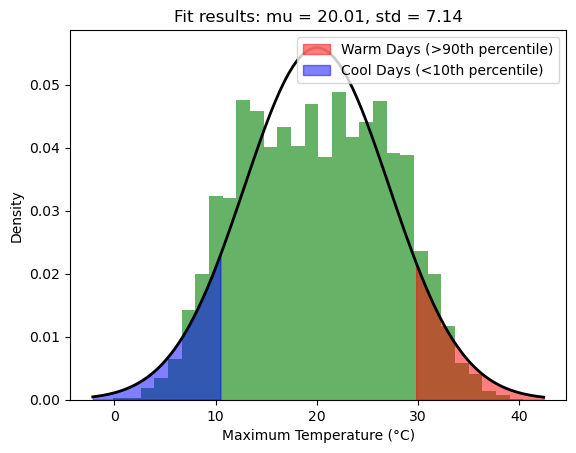

Percentage of days with maximum temperature > 90th percentile (Warm Days): 9.28%
Percentage of days with maximum temperature < 10th percentile (Cool Days): 9.71%
Temperature threshold for warm days (> 90th percentile): 29.40°C
Percentage of days with maximum temperature > 90th percentile: 9.28%
Temperature threshold for cool days (< 10th percentile): 10.60°C
Percentage of days with maximum temperature < 10th percentile: 9.71%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'df' is your DataFrame and it contains a column 'Maximum.Temp..C.' for maximum temperatures

# Remove rows where maximum temperature is -99.9 (missing values)
cleaned_df = df[df['Maximum.Temp..C.'] != -99.9]

# Step 1: Plot Gaussian Distribution
mu, std = norm.fit(cleaned_df['Maximum.Temp..C.'])

# Plot the histogram
plt.hist(cleaned_df['Maximum.Temp..C.'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Density')

# Step 2 & 3: Identify extreme warm and cool days and calculate percentages
percentile_90th = np.percentile(cleaned_df['Maximum.Temp..C.'], 90)
percentile_10th = np.percentile(cleaned_df['Maximum.Temp..C.'], 10)

warm_days_percentage = (cleaned_df['Maximum.Temp..C.'] > percentile_90th).mean() * 100
cool_days_percentage = (cleaned_df['Maximum.Temp..C.'] < percentile_10th).mean() * 100

# Highlighting areas for warm and cool days
plt.fill_between(x, 0, p, where=(x>percentile_90th), color='red', alpha=0.5, label='Warm Days (>90th percentile)')
plt.fill_between(x, 0, p, where=(x<percentile_10th), color='blue', alpha=0.5, label='Cool Days (<10th percentile)')

plt.legend()
plt.show()

# Printing percentages
print(f"Percentage of days with maximum temperature > 90th percentile (Warm Days): {warm_days_percentage:.2f}%")
print(f"Percentage of days with maximum temperature < 10th percentile (Cool Days): {cool_days_percentage:.2f}%")

# Printing the temperature thresholds along with percentages
print(f"Temperature threshold for warm days (> 90th percentile): {percentile_90th:.2f}°C")
print(f"Percentage of days with maximum temperature > 90th percentile: {warm_days_percentage:.2f}%")

print(f"Temperature threshold for cool days (< 10th percentile): {percentile_10th:.2f}°C")
print(f"Percentage of days with maximum temperature < 10th percentile: {cool_days_percentage:.2f}%")



In [5]:

# Ensure 'Year' is correctly extracted
warm_days['Year'] = warm_days['Date'].dt.year
cold_days['Year'] = cold_days['Date'].dt.year

# Count occurrences by year for both warm and cool days
warm_days_annual_count = warm_days.groupby('Year').size().reset_index(name='Warm Days Count')
cool_days_annual_count = cold_days.groupby('Year').size().reset_index(name='Cool Days Count')

# Exclude specific years and placeholder values for both DataFrames before plotting
warm_days_annual_count_filtered = warm_days_annual_count[(warm_days_annual_count['Year'] != 1877) & (warm_days_annual_count['Year'] != 1922)]
cool_days_annual_count_filtered = cool_days_annual_count[(cool_days_annual_count['Year'] != 1877) & (cool_days_annual_count['Year'] != 1922)]

# Merge the counts to ensure all years are present in both datasets
annual_counts = pd.merge(warm_days_annual_count_filtered, cool_days_annual_count_filtered, on='Year', how='outer').fillna(0)

# Sort by year to ensure the plot follows chronological order
annual_counts.sort_values('Year', inplace=True)

# Plotting both Warm Days and Cool Days by Year in a single graph
plt.figure(figsize=(14, 8))
plt.plot(annual_counts['Year'], annual_counts['Warm Days Count'], marker='o', linestyle='-', color='red', label='Warm Days')
plt.plot(annual_counts['Year'], annual_counts['Cool Days Count'], marker='o', linestyle='-', color='blue', label='Cool Days')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Annual Count of Warm and Cool Days (Excluding 1877 and 1922)')

# Ensure all years are shown on the x-axis
plt.xticks(sorted(annual_counts['Year'].unique()), rotation=90)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'warm_days' is not defined

C:\Users\manda\AppData\Local\Temp\ipykernel_4692\1146620725.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


            Date  Day  Month  Year  Attached.Thermometer..C.  \
193   1877-07-13   13      7  1877                      10.6   
194   1877-07-14   14      7  1877                      10.0   
195   1877-07-15   15      7  1877                       8.3   
198   1877-07-18   18      7  1877                       8.3   
199   1877-07-19   19      7  1877                       7.2   
...          ...  ...    ...   ...                       ...   
16327 1921-09-15   15      9  1921                      14.4   
16585 1922-05-31   31      5  1922                       8.9   
16592 1922-07-06    7      6  1922                       7.2   
16614 1922-06-29   29      6  1922                       7.2   
16615 1922-06-30   30      6  1922                       7.2   

       Sea.Level.Pressure..hPa.  Dry.Bulb.Temp..C.  Wet.Bulb.Temp..C.  \
193                     1017.16                7.8                7.2   
194                     1013.25                6.1                5.6   
195         

C:\Users\manda\AppData\Local\Temp\ipykernel_4692\1146620725.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warm_days['Month'] = warm_days['Date'].dt.month
C:\Users\manda\AppData\Local\Temp\ipykernel_4692\1146620725.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cold_days['Month'] = cold_days['Date'].dt.month


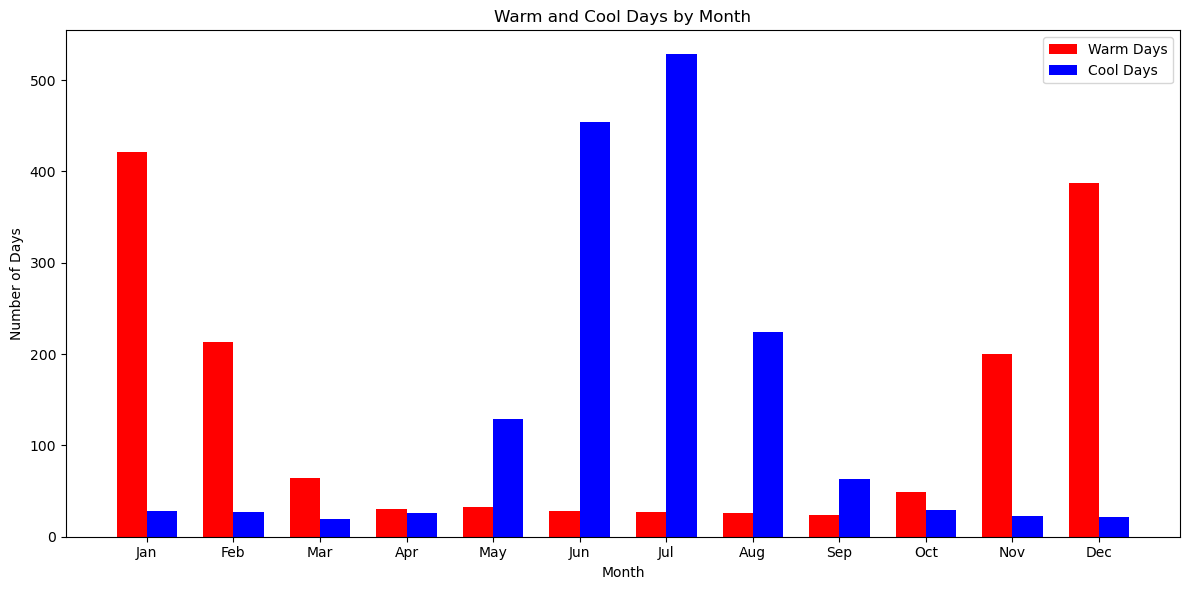

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'df' is your DataFrame and it contains 'Maximum.Temp..C.' column
# Make sure to convert the 'Date' column to datetime format first
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# First, ensure 'Maximum.Temp..C.' doesn't include missing values marked as -99.9
cleaned_df = df[df['Maximum.Temp..C.'] != -99.9].copy()

# Calculate the 90th and 10th percentiles for the 'Maximum.Temp..C.' column
percentile_90th = np.percentile(cleaned_df['Maximum.Temp..C.'], 90)
percentile_10th = np.percentile(cleaned_df['Maximum.Temp..C.'], 10)

# Identify warm and cool days based on the percentiles
warm_days = cleaned_df[cleaned_df['Maximum.Temp..C.'] > percentile_90th]
cold_days = cleaned_df[cleaned_df['Maximum.Temp..C.'] < percentile_10th]

print(cold_days)
# Extract month information
warm_days['Month'] = warm_days['Date'].dt.month
cold_days['Month'] = cold_days['Date'].dt.month

# Count occurrences by month for both warm and cold days
warm_days_count = warm_days.groupby('Month').size()
cold_days_count = cold_days.groupby('Month').size()

# Ensure all months are represented, even if no warm or cold days occurred in them
months = range(1, 13)
warm_days_count = warm_days_count.reindex(months, fill_value=0)
cold_days_count = cold_days_count.reindex(months, fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(months))

plt.bar(index, warm_days_count, bar_width, label='Warm Days', color='red')
plt.bar(index + bar_width, cold_days_count, bar_width, label='Cool Days', color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.title('Warm and Cool Days by Month')
plt.xticks(index + bar_width / 2, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

plt.tight_layout()
plt.show()


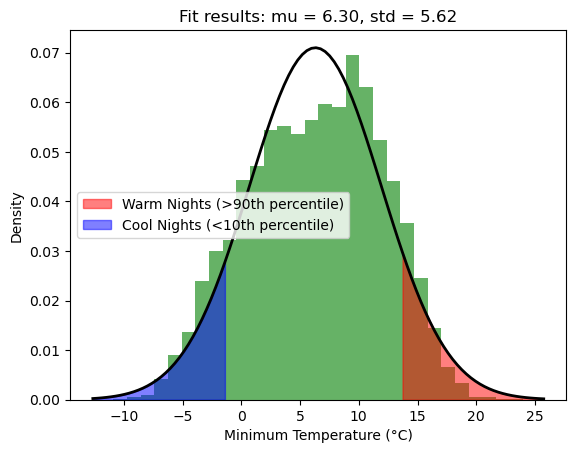

Percentage of warm nights (> 90th percentile): 9.99%
Percentage of cool nights (< 10th percentile): 9.99%
Temperature threshold for warm nights (> 90th percentile): 13.50°C
Percentage of nights with minimum temperature > 90th percentile: 9.99%
Temperature threshold for cool nights (< 10th percentile): -1.30°C
Percentage of nights with minimum temperature < 10th percentile: 9.99%


In [7]:
from scipy.stats import norm

# Exclude missing values marked as -99.9
cleaned_df = df[df['Minimum.Temp..C.'] != -99.9].copy()

# Fit a Gaussian distribution
mu, std = norm.fit(cleaned_df['Minimum.Temp..C.'])

# Plot the histogram
plt.hist(cleaned_df['Minimum.Temp..C.'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
plt.title(title)
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Density')

# Highlight the 90th and 10th percentiles
percentile_90th = np.percentile(cleaned_df['Minimum.Temp..C.'], 90)
percentile_10th = np.percentile(cleaned_df['Minimum.Temp..C.'], 10)
plt.fill_between(x, 0, p, where=(x>percentile_90th), color='red', alpha=0.5, label='Warm Nights (>90th percentile)')
plt.fill_between(x, 0, p, where=(x<percentile_10th), color='blue', alpha=0.5, label='Cool Nights (<10th percentile)')

plt.legend()
plt.show()

warm_nights = cleaned_df[cleaned_df['Minimum.Temp..C.'] > percentile_90th]
cool_nights = cleaned_df[cleaned_df['Minimum.Temp..C.'] < percentile_10th]

# Calculate percentages
warm_nights_percentage = (len(warm_nights) / len(cleaned_df)) * 100
cool_nights_percentage = (len(cool_nights) / len(cleaned_df)) * 100

print(f"Percentage of warm nights (> 90th percentile): {warm_nights_percentage:.2f}%")
print(f"Percentage of cool nights (< 10th percentile): {cool_nights_percentage:.2f}%")

# Printing the temperature thresholds along with percentages for minimum temperatures
print(f"Temperature threshold for warm nights (> 90th percentile): {percentile_90th:.2f}°C")
print(f"Percentage of nights with minimum temperature > 90th percentile: {warm_nights_percentage:.2f}%")

print(f"Temperature threshold for cool nights (< 10th percentile): {percentile_10th:.2f}°C")
print(f"Percentage of nights with minimum temperature < 10th percentile: {cool_nights_percentage:.2f}%")


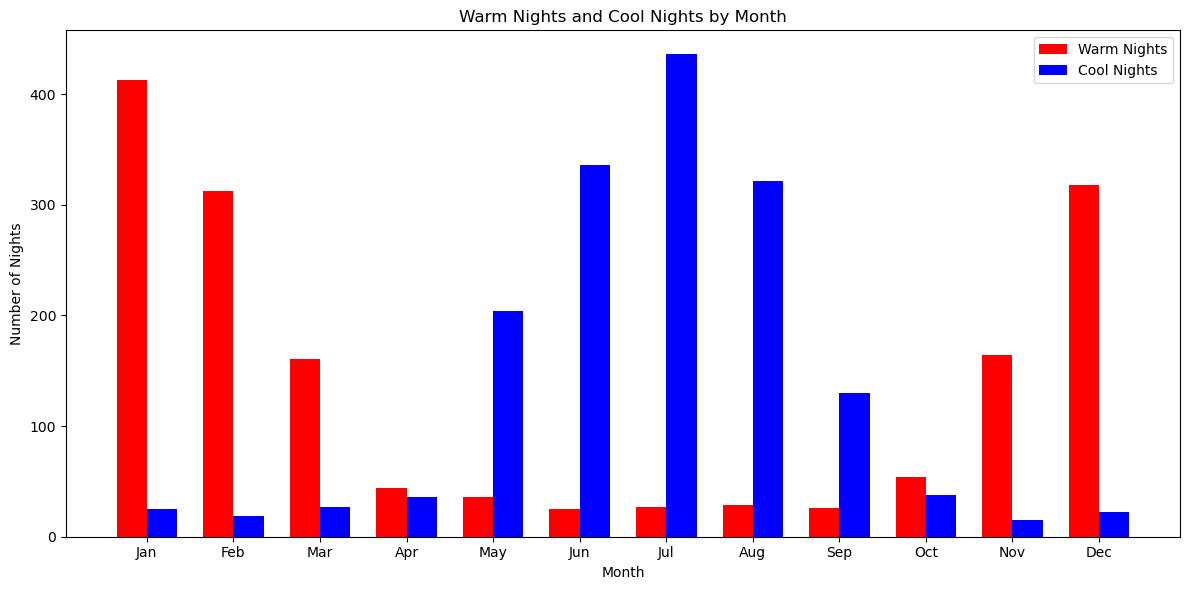

In [8]:
# Make sure to convert the 'Date' column to datetime format first
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], errors='coerce')

# Now, it's safe to extract the month information
cleaned_df['Month'] = cleaned_df['Date'].dt.month

# After ensuring 'Date' is datetime, filter for warm and cool nights again
percentile_90th = np.percentile(cleaned_df['Minimum.Temp..C.'], 90)
percentile_10th = np.percentile(cleaned_df['Minimum.Temp..C.'], 10)

warm_nights = cleaned_df[cleaned_df['Minimum.Temp..C.'] > percentile_90th].copy()
cool_nights = cleaned_df[cleaned_df['Minimum.Temp..C.'] < percentile_10th].copy()

# Since 'Date' is now confirmed to be in datetime format, this will work:
warm_nights['Month'] = warm_nights['Date'].dt.month
cool_nights['Month'] = cool_nights['Date'].dt.month

# Proceed with counting occurrences by month and plotting
# ... rest of the analysis as before ...

# Extract month information
cleaned_df['Month'] = cleaned_df['Date'].dt.month
warm_nights['Month'] = warm_nights['Date'].dt.month
cool_nights['Month'] = cool_nights['Date'].dt.month

# Count occurrences by month
warm_nights_count = warm_nights.groupby('Month').size()
cool_nights_count = cool_nights.groupby('Month').size()

# Plotting
plt.figure(figsize=(12, 6))
months = range(1, 13)
bar_width = 0.35
index = np.arange(len(months))

plt.bar(index, warm_nights_count.reindex(months, fill_value=0), bar_width, label='Warm Nights', color='red')
plt.bar(index + bar_width, cool_nights_count.reindex(months, fill_value=0), bar_width, label='Cool Nights', color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Nights')
plt.title('Warm Nights and Cool Nights by Month')
plt.xticks(index + bar_width / 2, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

plt.tight_layout()
plt.show()


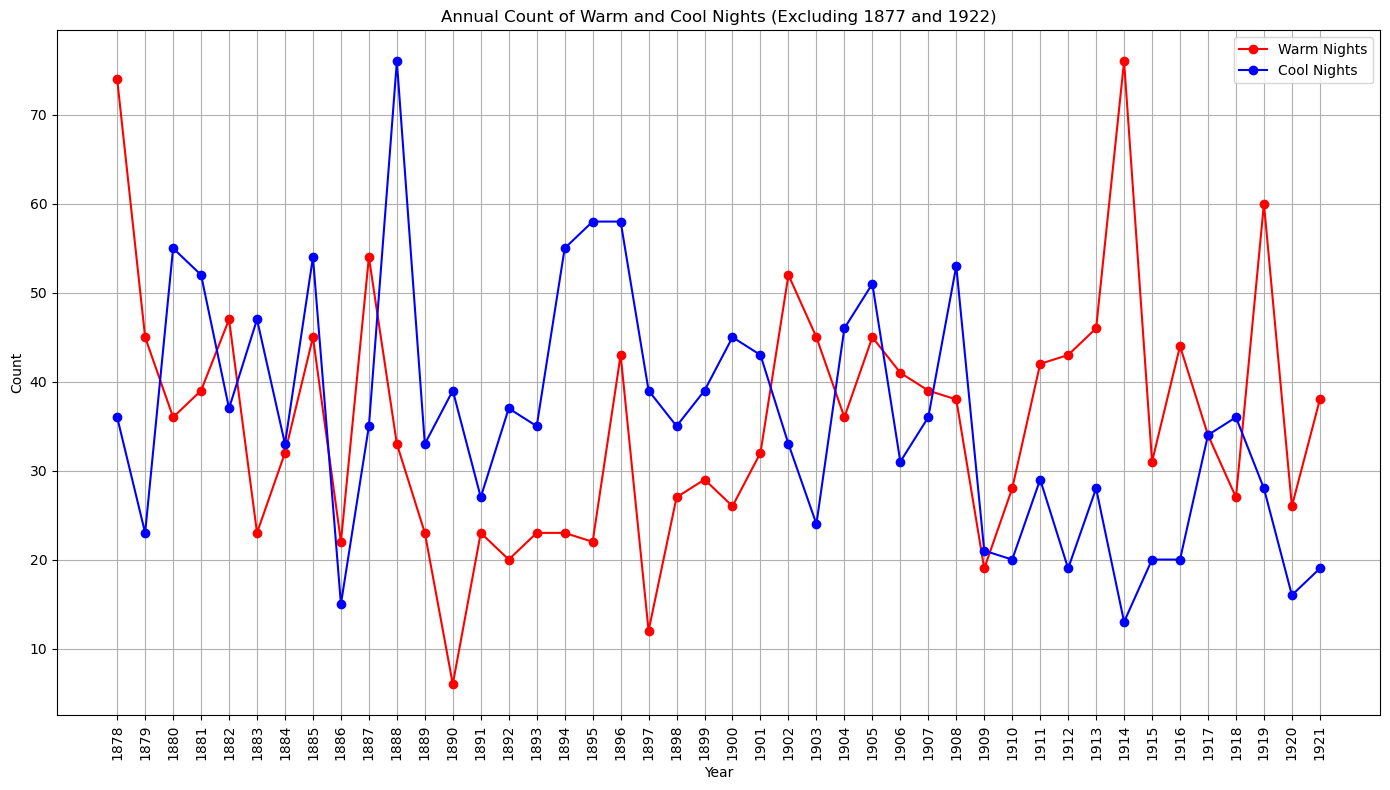

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Exclude years 1877 and 1922 from the DataFrame
filtered_warm_nights = warm_nights[(warm_nights['Year'] != 1877) & (warm_nights['Year'] != 1922)]
filtered_cool_nights = cool_nights[(cool_nights['Year'] != 1877) & (cool_nights['Year'] != 1922)]

# Count occurrences by year for both warm and cool nights
warm_nights_annual_count_filtered = filtered_warm_nights.groupby('Year').size().reset_index(name='Warm Nights Count')
cool_nights_annual_count_filtered = filtered_cool_nights.groupby('Year').size().reset_index(name='Cool Nights Count')

# Merge the counts to ensure all years are present in both datasets
annual_counts = pd.merge(warm_nights_annual_count_filtered, cool_nights_annual_count_filtered, on='Year', how='outer').fillna(0)

# Sort by year to ensure the plot follows chronological order
annual_counts.sort_values('Year', inplace=True)

# Plotting both Warm Nights and Cool Nights by Year in a single graph
plt.figure(figsize=(14, 8))
plt.plot(annual_counts['Year'], annual_counts['Warm Nights Count'], marker='o', linestyle='-', color='red', label='Warm Nights')
plt.plot(annual_counts['Year'], annual_counts['Cool Nights Count'], marker='o', linestyle='-', color='blue', label='Cool Nights')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Annual Count of Warm and Cool Nights (Excluding 1877 and 1922)')

# Ensure all years are shown on the x-axis
plt.xticks(annual_counts['Year'].unique(), rotation=90)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



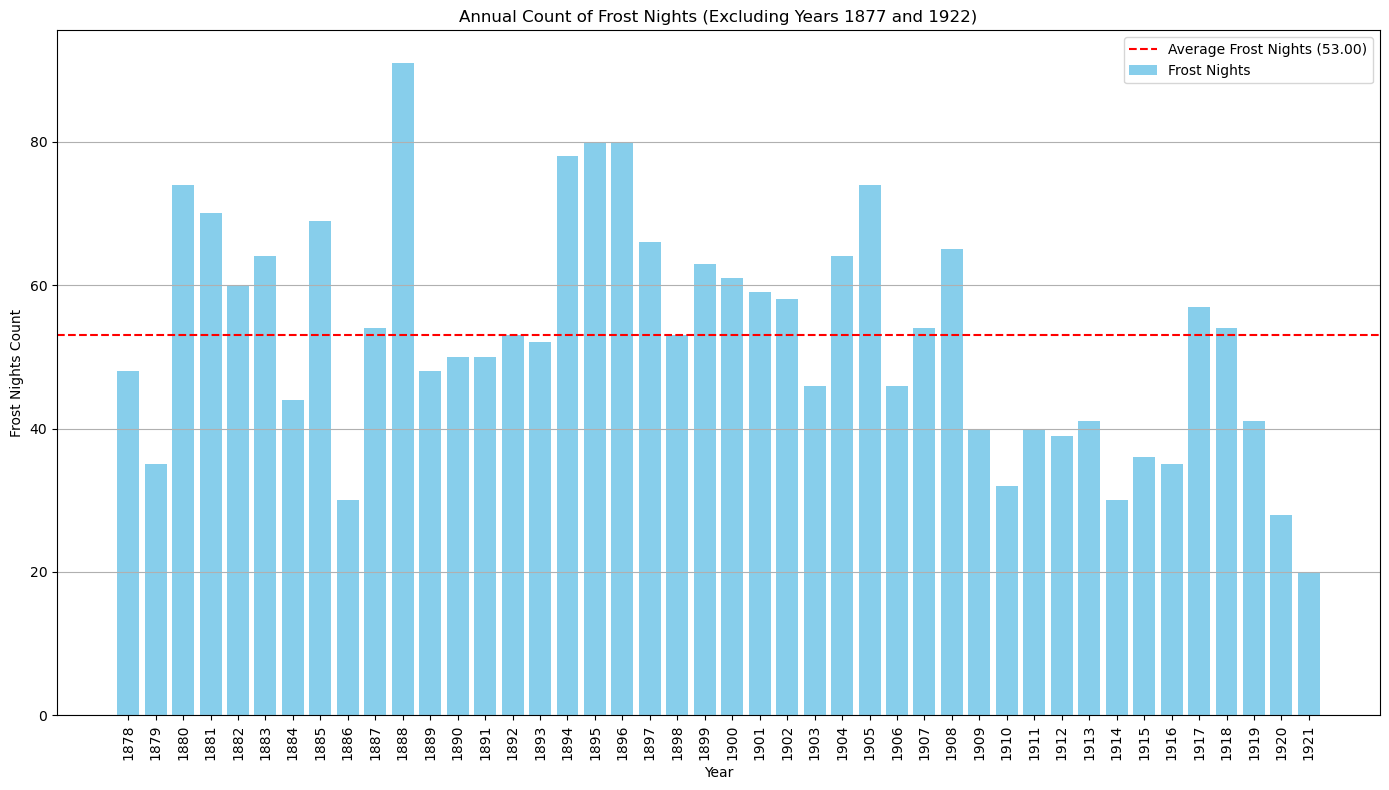

In [10]:

# Filter out the years 1877 and 1922, and exclude placeholder values of -99.9 for minimum temperature
filtered_df = df[(df['Year'] != 1877) & (df['Year'] != 1922) & (df['Minimum.Temp..C.'] != -99.9)]

# Identify frost nights (nights with minimum temperature < 0°C)
frost_nights_df = filtered_df[filtered_df['Minimum.Temp..C.'] < 0]

# Count frost nights annually
annual_frost_nights_count = frost_nights_df.groupby('Year').size().reset_index(name='Frost Nights Count')

# Plotting with all years on the x-axis
plt.figure(figsize=(14, 8))  # Adjusted figure size for better readability
plt.bar(annual_frost_nights_count['Year'], annual_frost_nights_count['Frost Nights Count'], color='skyblue', label='Frost Nights')
plt.xlabel('Year')
plt.ylabel('Frost Nights Count')
plt.title('Annual Count of Frost Nights (Excluding Years 1877 and 1922)')

# Ensuring all years are shown on the x-axis
all_years = annual_frost_nights_count['Year'].unique()  # Get all unique years
plt.xticks(all_years, rotation=90)  # Set all years as x ticks and rotate for better readability

# Calculate and plot the average line
average_frost_nights = annual_frost_nights_count['Frost Nights Count'].mean()
plt.axhline(y=average_frost_nights, color='r', linestyle='--', label=f'Average Frost Nights ({average_frost_nights:.2f})')

plt.grid(axis='y')
plt.legend()
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
